# 13AR_vocab_cooperativity_expression

3/24/2021 - post CIG laura D

Also some other thoughts I had about how to squeeze more juice out of the MPRA data:
1) Are there examples of driver motifs (a motif alone that drives expression and the second motif is kind of like a passenger)
2) What are the cases where the motifs alone drive expression but A_B expression is lowered (repressed)
3) additive vs synergistic cases
4) DK had that whole buffer vs additive vs synergy/cooperativity panel, so I can go back and look at those definition again as well

But I kind of pitched it as that framework for my talk seeing as we first did identify regulatory ‘words’ (1 motif) and then expanded it to vocabs (2 motifs) so we can make a lot of comments about all these different results potentially


## 1. Do you mind making a heatmap of differential expression analysis for the TFs from sig_cooperativity_tfs.csv in KCD6, A431, MC, COLO, GM, Colon?
- sig_cooperativity_tfs.csv
- sig_cooperativity_vocabs.csv



I plan on getting GO Terms/target genes for the vocabs.
I think I can use those same 'A431_df = pd.read_csv( '../data/processed/fig4_modelling/tf_tf_pairs_scc/expr_A431-CTRLi_loop_type.csv',index_col=0)' files to look at vocab enrichment in enhancers vs promoters vs e-p?


## 2 But would you be able to look at vocab enrichment in ATAC peaks alone/HiChIP loops alone/PLTs in the test tissue over the other tissues?
this might take awhile... will need to think about how to do it (edited) 



- Sorry, also can't find the MC vocab KLF5::NFYB in ../data/processed/fig4_modelling/tf_tf_pairs/expr_Melanocytes_loop_type.csv


- Can you send me your code for how you were making these type of plots? Wanting to see if I can make something similar for the sig vocab results (logFC of RNA expression by tissue, then connected dots of TF motifs) and their target gene GO terms (by p value).

# 1. differential expression analysis 

Do you mind making a heatmap of differential expression analysis for the TFs from sig_cooperativity_tfs.csv in KCD6, A431, MC, COLO, GM, Colon?
- sig_cooperativity_tfs.csv
- sig_cooperativity_vocabs.csv


In [1]:
library(tidyverse)
library(pheatmap)
library(RColorBrewer)
library(viridis)
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
    
   dev.off()
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite



In [18]:
rna_df = read.csv('../data/interim/rna/tissue_tpm_sym.csv',row.names=1)
head(rna_df)
# colnames(rna_df)

,A431.CTRLi,A431.p63i,Airway,Astrocytes,Bladder,CAL27.CTRLi,CAL27.p63i,COLO_SCR_DMSO,COLO_SCR_PLX,COLO_shMITF_DMSO,⋯,SKMEL5_SCR_DMSO,SKMEL5_SCR_PLX,SKMEL5_shMITF.DMSO,SKMEL5_shMITF_PLX,Thyroid,Uterine,WM_SCR_DMSO,WM_SCR_PLX,WM_shMITF_DMSO,WM_shMITF_PLX
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,3.740,3.965,3.575,18.660,3.31,0.100,0.055,48.420,49.885,42.995,⋯,55.475,70.930,47.805,83.920,0.390,2.425,92.060,142.880,112.345,145.610
A1BG-AS1,0.405,0.045,0.055,0.430,0.03,0.165,0.990,0.130,0.120,0.135,⋯,0.365,0.405,0.280,0.140,0.055,0.030,0.380,0.405,0.325,0.390
A1CF,0.000,0.000,0.005,0.010,0.01,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000
A2M,0.025,0.060,0.000,50.670,1.10,0.150,0.235,37.565,72.670,37.580,⋯,64.130,89.220,106.345,193.725,0.105,0.950,54.645,79.480,62.120,68.885
A2M-AS1,0.000,0.005,0.025,0.070,0.00,0.010,0.000,0.010,0.080,0.025,⋯,0.055,0.030,0.040,0.095,0.000,0.000,0.050,0.030,0.050,0.135
A2ML1,0.015,0.020,0.980,0.055,1.10,0.160,0.045,0.000,0.000,0.000,⋯,0.010,0.025,0.005,0.000,1.235,0.270,0.000,0.000,0.030,0.060


In [3]:
tissues = c('GDSD6','A431.CTRLi','Melanocytes','COLO_SCR_DMSO','GM12878','Colon')


## 1A sig_cooperativity_tfs.csv

In [32]:
tfs = unique(read.csv('../data/processed/fig7_vocab_go/sig_cooperativity_tfs.csv',
         stringsAsFactor=F,header=F)$V1)
length(tfs)

[1] 37

In [47]:
rna_df_sel = log2(rna_df[tfs,tissues]+1)
rna_df_sel[rna_df_sel>5]=5
colnames(rna_df_sel) = c('KCD6','A431','MC','COLO','GM','Colon')

pdf 
  2

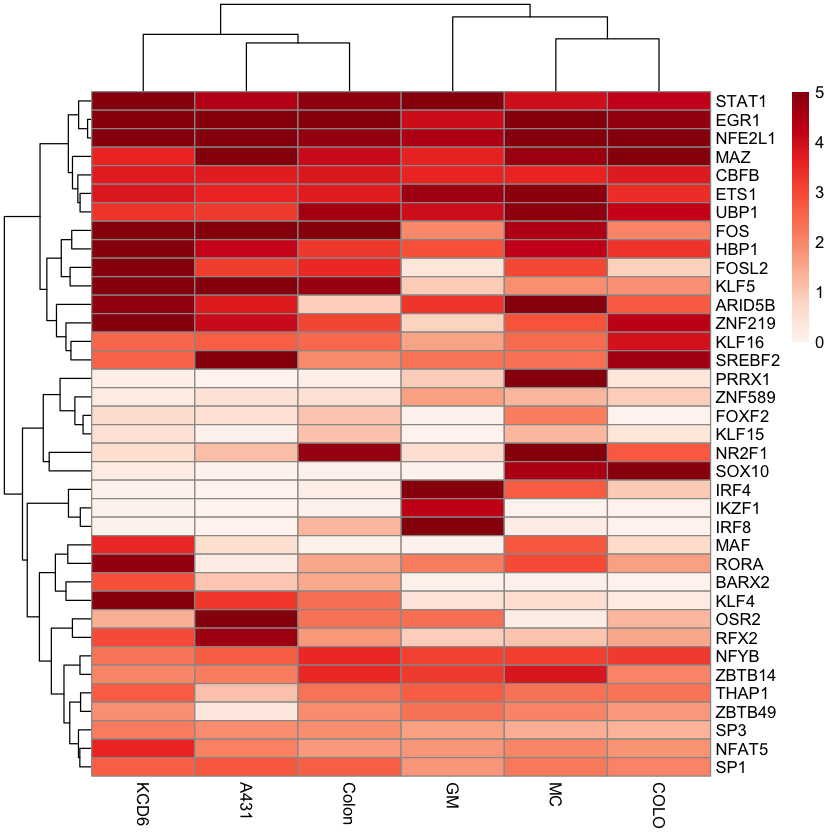

In [48]:
p = pheatmap(rna_df_sel,
#             color=colorRampPalette(rev(brewer.pal(n=8, name='RdBu')))(255))
            color=colorRampPalette(brewer.pal(n=8, name='Reds'))(255))
save_pheatmap_pdf(p, '../data/processed/fig7_vocab_go/sig_cooperativity_tfs_log2tpm.pdf',
                 width=7,height=10)

In [87]:
get_rna_exp = function(gene, tissue){
    return (rna_df[gene, tissue])
}
tissue_mapper = data.frame(tissue_rna=tissues,tissue= c('KCD6','A431','MC','COLO','GM','Colon'))
tissue_mapper[] <- lapply(tissue_mapper, as.character)
tissue_mapper

tissue_rna,tissue
<chr>,<chr>
GDSD6,KCD6
A431.CTRLi,A431
Melanocytes,MC
COLO_SCR_DMSO,COLO
GM12878,GM
Colon,Colon


In [76]:
get_rna_exp('STAT1','COLO_SCR_DMSO')
rna_df['STAT1','COLO_SCR_DMSO']


[1] 17.35

[1] 17.35

## 1B sig_cooperativity_vocabs.csv

In [119]:
vocab_df = read.csv('../data/processed/fig7_vocab_go/sig_cooperativity_vocabs.csv',
                   stringsAsFactor=F)
vocab_df = vocab_df%>%
    separate(vocab, c('vocab1','vocab2'),sep='::',remove=F)%>%
    left_join(tissue_mapper, by='tissue')
    
rownames(vocab_df) = 1:dim(vocab_df)[1]

# rownames(vocab_df)
vocab_df$tpm1 = mapply(get_rna_exp,vocab_df$vocab1,vocab_df$tissue_rna)
vocab_df$tpm2 = mapply(get_rna_exp,vocab_df$vocab2,vocab_df$tissue_rna)
# vocab_df$tpm1 = 0
# vocab_df$tpm2 = 0
# for (i in 1:dim(vocab_df)[1]){
#     vocab_df$tpm1[i] = rna_df[vocab_df$vocab1[i],vocab_df$tissue_rna[i]]
# #     print(vocab_df$vocab1[i])
# #     print(vocab_df$tissue_rna[i])
# #     print(rna_df[vocab_df$vocab1[i],vocab_df$tissue_rna[i]])
# #     print( vocab_df$tpm1[i])
#     vocab_df$tpm2[i] = get_rna_exp(vocab_df$vocab2[i],vocab_df$tissue_rna[i])
# }
dim(vocab_df)
vocab_df
write.csv(vocab_df, '../data/processed/fig7_vocab_go/sig_cooperativity_vocabs_tpm.csv')

[1] 26  7

,vocab,vocab1,vocab2,tissue,tissue_rna,tpm1,tpm2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,ARID5B::STAT1,ARID5B,STAT1,COLO,COLO_SCR_DMSO,5.590,17.350
2,BARX2::FOXF2,BARX2,FOXF2,Colon,Colon,1.775,1.060
3,CBFB::IRF8,CBFB,IRF8,GM,GM12878,10.820,51.240
4,EGR1::SP1,EGR1,SP1,A431,A431.CTRLi,528.735,5.865
5,EGR1::SP3,EGR1,SP3,A431,A431.CTRLi,528.735,2.785
6,ETS1::IRF4,ETS1,IRF4,GM,GM12878,23.770,50.510
7,FOS::RORA,FOS,RORA,KCD6,GDSD6,106.115,27.090
8,FOSL2::SREBF2,FOSL2,SREBF2,KCD6,GDSD6,33.370,4.950
9,HBP1::KLF5,HBP1,KLF5,KCD6,GDSD6,47.905,39.700


pdf 
  2

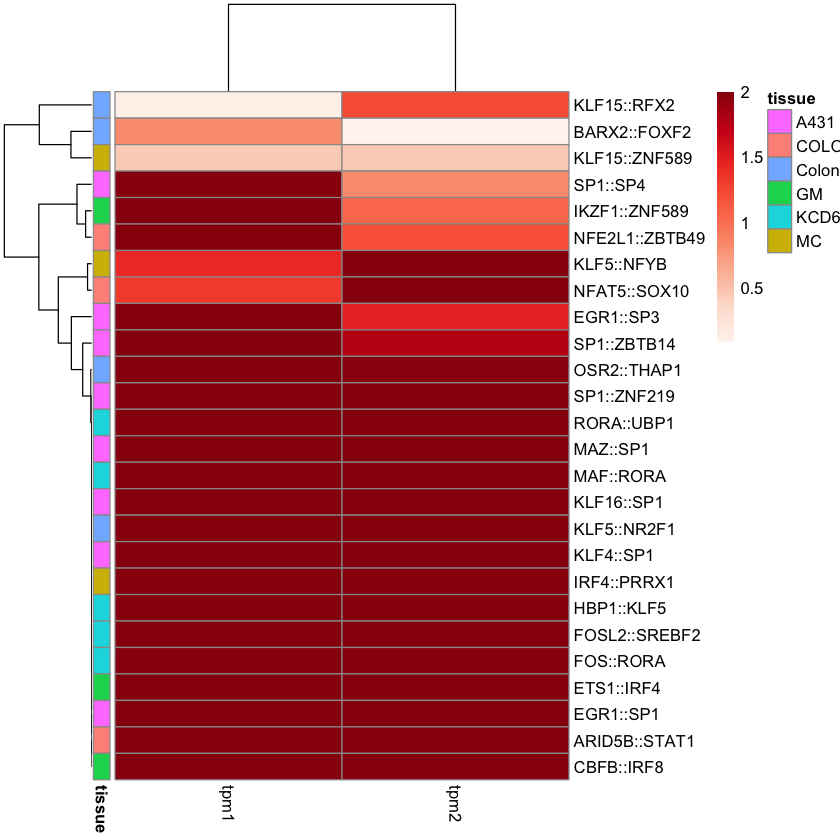

In [117]:
rownames(vocab_df) = vocab_df$vocab
plot_vocab = log2(vocab_df[,c('tpm1','tpm2')])
plot_vocab[plot_vocab>2] = 2
p2 = pheatmap(plot_vocab,
              annotation_row=vocab_df%>%select(tissue),
#             color=colorRampPalette(rev(brewer.pal(n=8, name='RdBu')))(255))
            color=colorRampPalette(brewer.pal(n=8, name='Reds'))(255))

save_pheatmap_pdf(p2, '../data/processed/fig7_vocab_go/sig_cooperativity_vocabs_log2tpm.pdf',
                 width=6,height=10)